# **Pre-processing Dataset**
> Pre-processing data text (Valid or Not)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
dataset_1 = "https://raw.githubusercontent.com/sains-data/MentiChat/refs/heads/main/data/New_Cons.csv"
dataset_2 = "https://raw.githubusercontent.com/sains-data/MentiChat/refs/heads/main/data/data_olip.csv"

# Mengatur tampilan agar teks panjang terlihat lengkap (Untuk dataset teks panjang)
pd.set_option('display.max_colwidth', None)

# Pembacaan dataset (Pandas Dataframe)
df = pd.read_csv(dataset_1)
df2 = pd.read_csv(dataset_2)

In [41]:
print(f"Panjang dataset 1 : {len(df)} baris")
print(f"Panjang dataset 2 : {len(df2)} baris")

Panjang dataset 1 : 11017 baris
Panjang dataset 2 : 25000 baris


In [60]:
# Menunjukan sampel data secara acak sebanyak 5 buah dari data 1
df.sample(5)

,Pertanyaan,Tanggapan,token_question,Pertanyaan_token_count,Tanggapan_token_count
4221,saya seorang yang selamat dari berbagai pengalaman pelecehan seksualpemerkosaan pemicu berdampak pada kehidupan seharihari saya dan hubungan seksual saya dengan pasangan saya saya mencoba belajar untuk mengatasinya,saya senang anda bersedia untuk tetap optimis tentang peningkatan kehidupan dan menawarkan hubungan yang lebih baik daripada beberapa yang anda derita saran satu adalah untuk mengembangkan kesabaran dengan diri sendiri dan proses mendapatkan kembali kesediaan anda untuk mempercayai orang lain seksualkeintiman melibatkan semua siapa kita sebenarnya berhatihatilah dengan siapa dan seberapa banyak anda membiarkan seseorang masuk ke dalam hidup anda adalah wajar bagi siapa pun yang pulih dari trauma memungkinkan diri anda untuk menarik diri ketika situasi terasa berbahaya rasa bahaya anda kemungkinan besar lebih waspada daripada jika anda tidak menjadi korban perhatikan dan bekerja sama dengan kesiapan anda sendiri untuk terlibat dalam percakapan diskusi dan seks dengan pasangan anda jelaskan semua ini kepada pasangan anda sehingga orang tersebut dapat berkembangkesabaran mereka sendiri dengan proses pemulihan anda,27,27,127
2731,kami menyewa dari orang tua pacar saya ayahnya mampir tanpa pemberitahuan dan tinggal untuk waktu yang lama dia membiarkan dirinya masuk ke rumah kita ketika kita tidak ada di sana setiap hari dan membawa anjing kita ke rumahnya dia mengambil surat kami dia tidak memiliki batasan dia orang yang memaksa dan kasar dia berharap untuk menghabiskan setiap akhir pekan di sekitar kita memberikan nasihat yang tidak diminta tentang pemeliharaan anak dan tidak menghormati privasi kita sama sekali dia menerobos tanpa peringatan dia memiliki kunci dan membiarkan dirinya masuk ke rumah kami tanpa meminta izin saya butuh bantuan bagaimana cara mengatasi ini,anda mengharapkan perilaku yang wajar dari ayah pacar anda karena ayah adalah miliknya pacar anda adalah orang yang berada dalam posisi untuk berbicara langsung dengan ayahnya tentang ekspektasi anda dan dia terhadap ayah tersebut jika pacar anda memiliki hubungan yang baik dengannya ayah padahal kedengarannya tidak seperti itu baguslah jika pacarmu mempunyai hubungan yang stres dan tegang dengan ayahnya maka entah bagaimana dia perlu dikembangkan atau dilatih dan didorong oleh orangorang dalam hidupnya yang benarbenar peduli dan mengenalnya cara untuk menyatakan standar yang sangat masuk akal yang anda jelaskan di sini jika semuanya gagal maka tempat tinggal baru selalu menjadi pilihan lain,101,101,102
3003,saya memiliki banyak masalah untuk diatasi saya memiliki riwayat pelecehan seksual saya seorang penderita kanker payudara dan saya adalah insomnia seumur hidup saya memiliki sejarah panjang depresi dan saya mulai memiliki kecemasan saya memiliki harga diri yang rendah tetapi saya telah menikah dengan bahagia selama hampir 35 tahun saya tidak pernah memiliki konseling tentang semua ini apakah saya memiliki terlalu banyak masalah untuk diatasi dalam konseling,setiap orang memiliki topik untuk dibahas ketika mereka memulai terapi tidak ada topik yang benar tidak semua orang punya waktu atau minat untuk memanfaatkan terapi tepat ketika topik yang signifikan muncul dalam hidup mereka karena anda adalah satu orang tidak peduli berapa banyak atau beberapa topik yang ingin anda atasi dalam terapi semua topik terkait dengan anda hasil terapi anda akan lebih transformasional daripada jika anda berbicara hanya dengan satu topik beruntung anda berada di puncak kliring dan menyelesaikan banyak kerentanan sekaligus anda akan merasa baru pada saat anda menyelesaikan pekerjaan terapi anda,66,66,93
8984,hmm saya kira salah satu tantangannya mungkin adalah menghadapi emosi atau kenangan yang tidak nyaman dari,membuka diri memang tidak selalu mudah namun hal ini dapat mengarah pada penyembuhan dan pertumbuhan ingatlah untuk melakukan segala sesuatunya sesuai dengan kemampuan anda send

In [61]:
# Menunjukan sampel data secara acak sebanyak 5 buah dari data 2
df2.sample(5)

,Question,Response,token_question,Question_token_count,Response_token_count
19932,"Hai, akhir-akhir ini aku merasa mati rasa, dan aku sangat ingin membuat perubahan dalam hidupku.",Halo ! Saya dapat merasakan kegembiraan Anda untuk memulai perjalanan transformasi ini. Bisakah Anda memberi tahu saya lebih banyak tentang masalah kesehatan spesifik apa yang ingin Anda atasi?,15,15,28
10188,Hai ! Aku merasa sangat tidak aman saat ini. Orang tuaku baru saja mengalami perceraian yang berantakan dan itu benar-benar membuatku terguncang.,Halo ! Saya di sini untuk mendukung Anda. Saya dapat membayangkan betapa sulit dan penuh emosi saat ini bagi Anda. Bagaimana Anda menghadapi perubahan terkini ini?,22,22,26
13657,"Hai, saya harap Anda baik-baik saja hari ini. Aku merasa begitu damai akhir-akhir ini, terutama sejak aku bertunangan dengan tunanganku tercinta. Tapi ada sesuatu yang ingin aku bicarakan denganmu.","Hai, saya senang mendengar Anda merasa damai dan selamat atas pertunangan Anda! Itu adalah saat yang membahagiakan dalam hidup seseorang. Apa yang ingin Anda diskusikan?",29,29,25
11430,"Hai, saya harap Anda baik-baik saja hari ini! Aku ingin membicarakan sesuatu yang ada dalam pikiranku akhir-akhir ini. Saya merasa terkejut dengan betapa seringnya saya menghadapi perundungan dalam kehidupan sehari-hari. Sungguh menyedihkan melihat beberapa orang memperlakukan orang lain dengan tidak adil dan tidak baik.",Halo ! Saya senang mendengar pendapat Anda dan saya di sini untuk mendengarkan dan mendukung Anda. Penindasan (bullying) memang merupakan masalah yang tersebar luas dan bisa sangat membebani serta meresahkan. Bisakah Anda ceritakan lebih banyak tentang situasi di mana Anda pernah mengalami penindasan?,44,44,43
8203,"Hei, akhir-akhir ini aku merasa sangat tertekan. Ini merupakan waktu yang sulit bagi saya.","Hai, saya turut prihatin mendengar Anda merasa tertekan. Bisakah Anda ceritakan lebih banyak tentang apa yang terjadi?",14,14,17


## **Melihat rata-rata token dari setiap data**
> Untuk menentukan dimensi dan menentukan token embedding dalam transfomer

In [ ]:
# Menghitung token didalam sebuah data
def count_tokens(text):
  """Counts the number of tokens in a given text string."""
  if isinstance(text, str):
    return len(text.split())
  else:
    return 0

### **Data 1 (Gede)**

In [48]:
# Apply the function to the 'Pertanyaan' column
df['token_question'] = df['Pertanyaan'].apply(count_tokens)

# Calculate the average number of tokens per row
average_tokens_per_row = df['token_question'].mean()
max_token_per_row = df['token_question'].max()
print(f"Rata-rata token per baris: {average_tokens_per_row} token")
print(f"Max token per baris: {max_token_per_row} token")


for column in df.columns:
    if pd.api.types.is_string_dtype(df[column]): # checking if column is string
      df[f'{column}_token_count'] = df[column].apply(count_tokens)
      average_tokens_per_column = df[f'{column}_token_count'].mean()
      print(f"Rata-rata token untuk kolom '{column}': {average_tokens_per_column} token")

Rata-rata token per baris: 44.815013161477715 token
Max token per baris: 460 token
Rata-rata token untuk kolom 'Pertanyaan': 44.815013161477715 token
Rata-rata token untuk kolom 'Tanggapan': 100.27575565035853 token


### **Data 2 (Olip)**

In [55]:
# Apply the function to the 'Pertanyaan' column
df2['token_question'] = df2['Question'].apply(count_tokens)

# Calculate the average number of tokens per row
average_tokens_per_row = df2['token_question'].mean()
max_token_per_row = df2['token_question'].max()
print(f"Rata-rata token per baris: {average_tokens_per_row} token")
print(f"Max token per baris: {max_token_per_row} token")

# Diterapkan pada semua kolom
for column in df2.columns:
    if pd.api.types.is_string_dtype(df2[column]): # checking if column is string
      df2[f'{column}_token_count'] = df2[column].apply(count_tokens)
      average_tokens_per_column = df2[f'{column}_token_count'].mean()
      print(f"Rata-rata token untuk kolom '{column}': {average_tokens_per_column} token")

Rata-rata token per baris: 34.16628 token
Max token per baris: 157 token
Rata-rata token untuk kolom 'Question': 34.16628 token
Rata-rata token untuk kolom 'Response': 37.19192 token


**Analisis**
---
Untuk laporan awal dari dataset masing-masing data :

**Dataset 1 (Gede)**
```
Rata-rata token per baris: 44.815013161477715 token
Max token per baris: 460 token
Rata-rata token untuk kolom 'Pertanyaan': 44.815013161477715 token
Rata-rata token untuk kolom 'Tanggapan': 100.27575565035853 token
```

**Dataset 2 (Olip)**
```
Rata-rata token per baris: 34.16628 token
Max token per baris: 157 token
Rata-rata token untuk kolom 'Question': 34.16628 token
Rata-rata token untuk kolom 'Response': 37.19192 token
```


## **Review Dataset Secara Singkat**

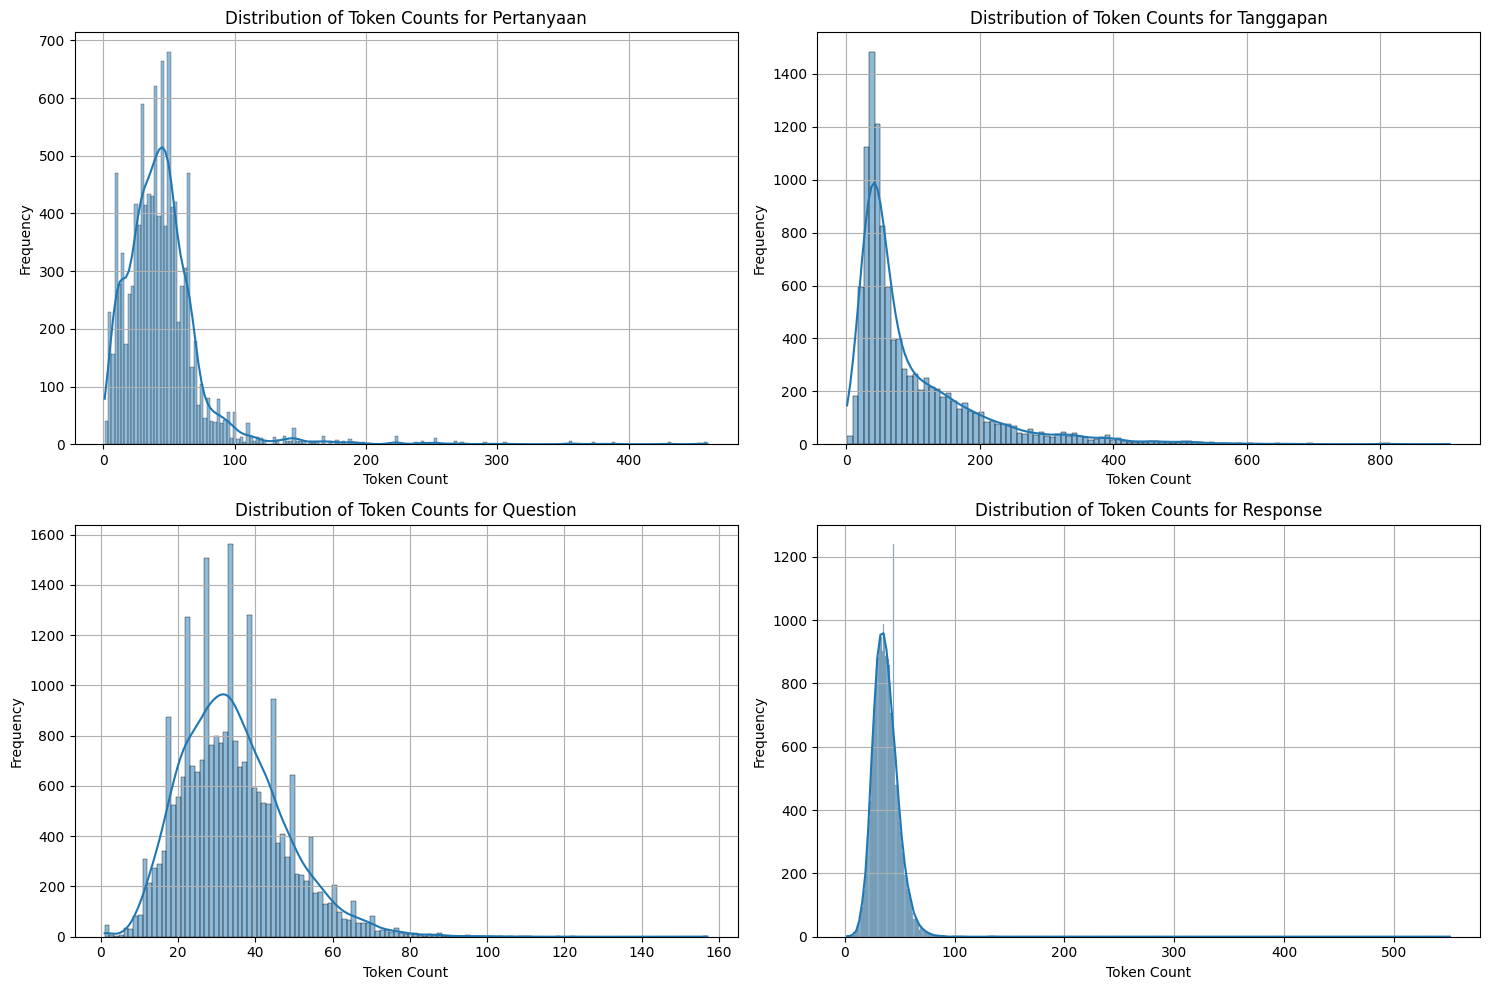

In [59]:
# Function to plot token distribution for a column in a specific axis
def plot_token_distribution(ax, df, column_name):
    sns.histplot(df[f'{column_name}_token_count'], kde=True, ax=ax)
    ax.set_title(f'Distribution of Token Counts for {column_name}')
    ax.set_xlabel('Token Count')
    ax.set_ylabel('Frequency')
    ax.grid(True, )

# Combine columns from both dataframes for plotting
columns_to_plot = []
for column in df.columns:
    if f'{column}_token_count' in df.columns:
        columns_to_plot.append((df, column))
for column in df2.columns:
    if f'{column}_token_count' in df2.columns:
        columns_to_plot.append((df2, column))

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2x2 array of axes for easier indexing

# Plot the distributions in each subplot
for i, (data, col) in enumerate(columns_to_plot[:4]):  # Limit to 4 plots
    plot_token_distribution(axes[i], data, col)

# Remove unused subplots if there are less than 4 columns to plot
if len(columns_to_plot) < 4:
    for j in range(len(columns_to_plot), 4):
        fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

**Kesimpulan**
---

Dataset sudah berdistribusi normal, dengan demikian analisis selesai kita akan mengambil token sebanyak 100 sebagai rata-rata embedding value.